In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=e232281f727be2e2a94a13b4d222111671159391152e5c36d758b06a6ee00f0f
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [ ]:
iris = load_iris()
x=iris.data
y=iris.target

In [ ]:
print(x.shape)

(150, 4)


In [ ]:
print(y.shape)

(150,)


In [ ]:
k_size=0.25
r_seed=100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)

In [ ]:
print("Shape of X_train" ,X_train.shape)
print("Shape of y_train" ,y_train.shape)
print("Shape of X_train" ,X_test.shape)
print("Shape of y_train" ,y_test.shape)

Shape of X_train (112, 4)
Shape of y_train (112,)
Shape of X_train (38, 4)
Shape of y_train (38,)


# Decision Tree of Hold Out 

In [ ]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold out ",a1)

Hold out  94.73684210526315


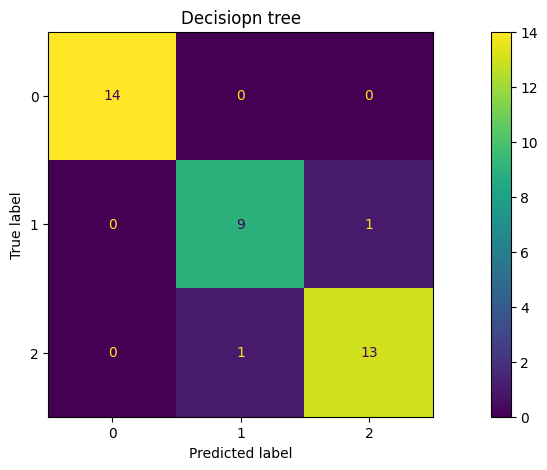

In [ ]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decisiopn tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)

# KNN

In [ ]:
#KNN (Nearst Neighbour)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

Accuracy 
97.36842105263158


# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")
print(classification_report(y_test,prediction_nb))

Accuracy of Test Data
Naive Bayes Accuracy : 94.73684210526315 %
Classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  95.0 %


# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,iris.data,iris.target,cv=5)

In [ ]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [ ]:
a5 = mean_accuracy*100
print(a5)

95.33333333333334


In [ ]:
print("Accurcay of Hold Out ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)

Accurcay of Hold Out  94.73684210526315
Accurcay of KNN  97.36842105263158
Accurcay of Naive Bayes  94.73684210526315
Accurcay of Cross Validation  95.0
